# Temperature Forecast Project using ML

In [26]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [27]:
# Importing the data set
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

In [28]:
pd.set_option('display.max_row',25) #Affiche au plus 25 éléments dans les résultats de pandas
pd.set_option('display.max_column',25) #Affiche au plus 25 éléments dans les résultats de pandas
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [29]:
df.dtypes.value_counts() # Compte les nombre de types de variables

float64    24
object      1
dtype: int64

In [30]:
df.shape

(7752, 25)

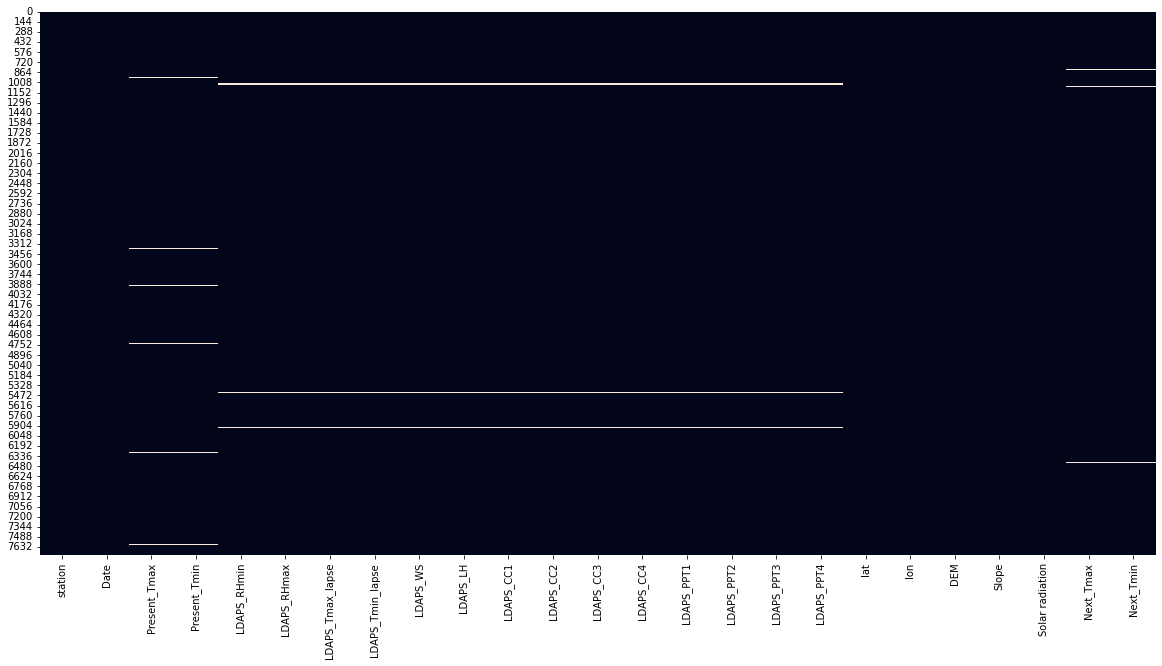

LDAPS_CC3           0.967492
LDAPS_WS            0.967492
LDAPS_RHmin         0.967492
LDAPS_RHmax         0.967492
LDAPS_Tmax_lapse    0.967492
LDAPS_PPT4          0.967492
LDAPS_PPT3          0.967492
LDAPS_PPT2          0.967492
LDAPS_PPT1          0.967492
LDAPS_CC4           0.967492
LDAPS_Tmin_lapse    0.967492
LDAPS_CC2           0.967492
LDAPS_CC1           0.967492
LDAPS_LH            0.967492
Present_Tmax        0.902993
Present_Tmin        0.902993
Next_Tmin           0.348297
Next_Tmax           0.348297
Date                0.025800
station             0.025800
lat                 0.000000
lon                 0.000000
DEM                 0.000000
Slope               0.000000
Solar radiation     0.000000
dtype: float64


In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)
plt.show()
print((df.isna().sum()/df.shape[0]*100).sort_values(ascending=False))

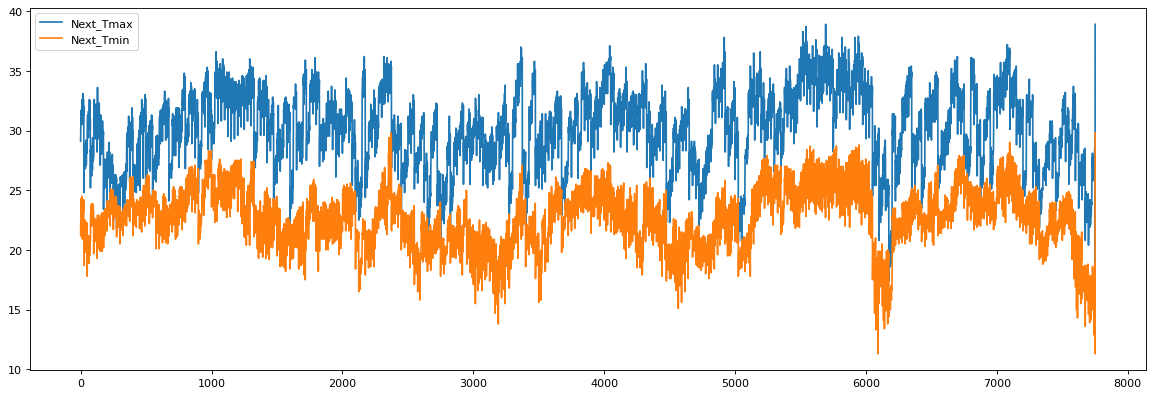

In [32]:
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(df["Next_Tmax"],label="Next_Tmax")
plt.plot(df["Next_Tmin"],label="Next_Tmin")
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

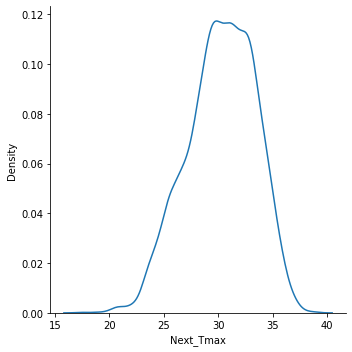

<Figure size 432x288 with 0 Axes>

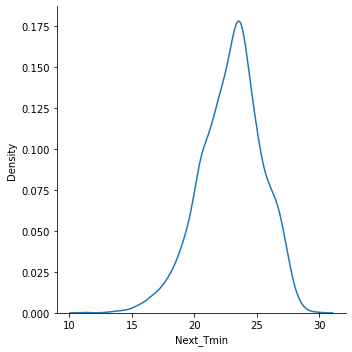

30.274886731391593
3.128010057855773
22.93222006472492
2.487612771331068


In [33]:
for col in ["Next_Tmax","Next_Tmin"]:
    plt.figure()
    sns.displot(df[col],kind='kde')
    plt.show()
print(df["Next_Tmax"].mean())
print(df["Next_Tmax"].std())
print(df["Next_Tmin"].mean())
print(df["Next_Tmin"].std())

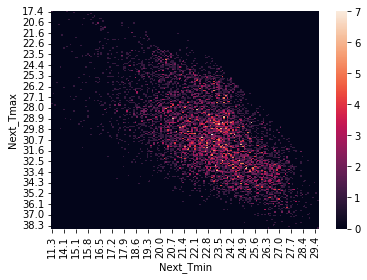

In [34]:
plt.figure()
sns.heatmap(pd.crosstab(df['Next_Tmax'],df['Next_Tmin']))
plt.show()

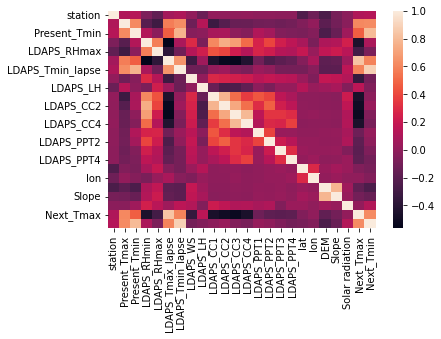

In [35]:
sns.heatmap(df.corr())

# Data preprocessing

## Aim :
- Deal with NaN
- Encode qualitative features
- Develop our first modelling strategy

In [36]:
# Importing the data set
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
Save = df.copy()

In [37]:
def feature_engineering(df):
    df = df.drop(["Date"],axis=1)
    print(df.dtypes.value_counts()) # Compte les nombre de types de variables
    return(df)

In [38]:
def imputation(df):
    #df = df.fillna(-999)
    df = df.dropna(axis=0)
    return df

In [39]:
def encodage(df):
    return df

In [40]:
def preprocessing(df):
    df = imputation(df)
    df = encodage(df)
    df = feature_engineering(df)
    
    X = df.drop(['Next_Tmax','Next_Tmin'],axis=1)
    y_max = df["Next_Tmax"]
    y_min = df["Next_Tmin"]
    
    print(X.shape)
    print(y_max.shape)
    
    return X,y_max,y_min

In [41]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [42]:
X_train, y_min_train, y_max_train = preprocessing(trainset)
X_test, y_min_test, y_max_test = preprocessing(testset)

float64    24
dtype: int64
(6068, 22)
(6068,)
float64    24
dtype: int64
(1520, 22)
(1520,)


# Modeling

## Aim :
- Standardise features
- Define a regression model
- Compute score and RMSE (in °C)

## Part 1 - SGDRegressor

In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_validate

In [44]:
reg_max = make_pipeline(StandardScaler(),
                    SGDRegressor(loss='squared_loss', penalty='l2', max_iter=1000, tol=1e-3))
reg_max.fit(X_train, y_max_train)

reg_min = make_pipeline(StandardScaler(),
                    SGDRegressor(loss='squared_loss', penalty='l2', max_iter=1000, tol=1e-3))
reg_min.fit(X_train, y_min_train)

cv_results_min = cross_validate(reg_min, X_train, y_min_train, cv=5, scoring=('r2', "neg_root_mean_squared_error"), return_train_score=True)
cv_results_max = cross_validate(reg_max, X_train, y_max_train, cv=5, scoring=('r2', "neg_root_mean_squared_error"), return_train_score=True)

print('Pour le Next_Tmin :')
print('Test RMSE :' , -cv_results_min['test_neg_root_mean_squared_error'].mean())
print('Test r2 :' , cv_results_min['test_r2'].mean())
print("Train RMSE :" , -cv_results_min['train_neg_root_mean_squared_error'].mean())
print("Train r2 :" , cv_results_min['train_r2'].mean())
print("*------------------------------------------*")
print('Pour le Next_Tmax :')
print('Test RMSE :' , -cv_results_max['test_neg_root_mean_squared_error'].mean())
print('Test r2 :' , cv_results_max['test_r2'].mean())
print("Train RMSE :" , -cv_results_max['train_neg_root_mean_squared_error'].mean())
print("Train r2 :" , cv_results_max['train_r2'].mean())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureW

Pour le Next_Tmin :
Test RMSE : 1.4716834021999181
Test r2 : 0.7752743023446468
Train RMSE : 1.4666580951826853
Train r2 : 0.7770796462901078
*------------------------------------------*
Pour le Next_Tmax :
Test RMSE : 1.0101573360412517
Test r2 : 0.8335875939533933
Train RMSE : 1.0061006232972771
Train r2 : 0.8353976774881193


In [45]:
Next_Tmin_predict = reg_min.predict(X_test)
Next_Tmax_predict = reg_max.predict(X_test)

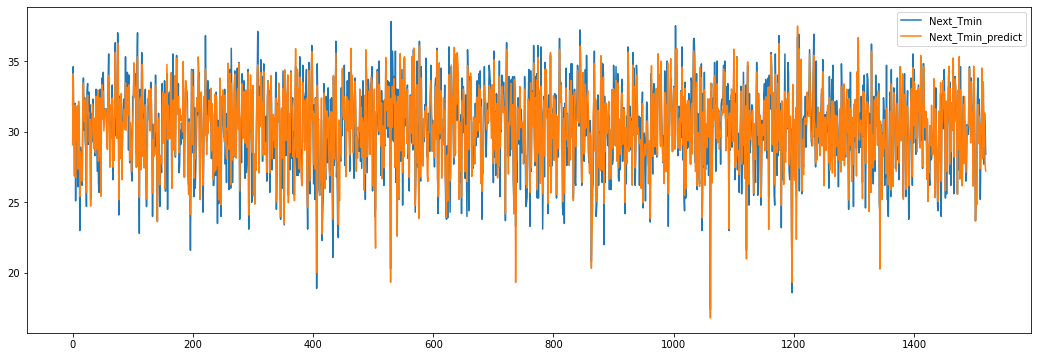

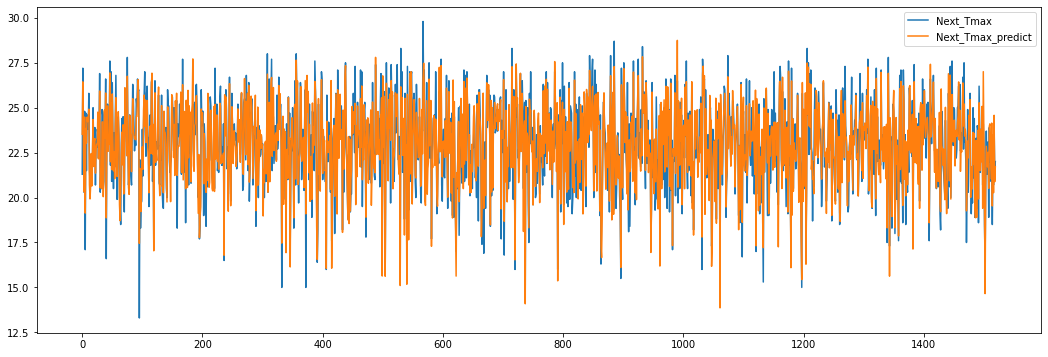

In [46]:
plt.figure(figsize=(18,6))
plt.plot(y_min_test.to_numpy(),label="Next_Tmin")
plt.plot(Next_Tmin_predict,label="Next_Tmin_predict")
plt.legend()
plt.show()

plt.figure(figsize=(18,6))
plt.plot(y_max_test.to_numpy(),label="Next_Tmax")
plt.plot(Next_Tmax_predict,label="Next_Tmax_predict")
plt.legend()
plt.show()

## Part 2 - RandomForest

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
   # 'bootstrap': [True],
    'max_depth': [70, 130]
    #'max_features': [3, 6],
    #'min_samples_leaf': [2, 3],
    #'min_samples_split': [4, 8],
    #'n_estimators': [1000, 500]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [55]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [56]:
# Fit the grid search to the Max data

grid_search.fit(X_train, y_max_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_max_test)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
{'max_depth': 70}
Model Performance
Average Error: 0.5800 degrees.
Accuracy = 97.39%.


In [57]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_max_train)
base_accuracy = evaluate(base_model, X_test, y_max_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.6310 degrees.
Accuracy = 97.16%.
Improvement of 0.23%.


In [58]:
# Fit the grid search to the Min data

grid_search.fit(X_train, y_min_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_min_test)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
{'max_depth': 70}
Model Performance
Average Error: 0.7137 degrees.
Accuracy = 97.60%.


In [60]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_min_train)
base_accuracy = evaluate(base_model, X_test, y_min_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.7870 degrees.
Accuracy = 97.36%.
Improvement of 0.25%.


In [61]:
Next_Tmax_TreeRegressor = RandomForestRegressor(random_state = 42, 
                                                bootstrap=True, max_depth=110, max_features=4, 
                                                min_samples_leaf=2, min_samples_split=4, n_estimators=900)
Next_Tmin_TreeRegressor = RandomForestRegressor(random_state = 42, 
                                                bootstrap=True, max_depth=70, max_features=6, 
                                                min_samples_leaf=2, min_samples_split=4, n_estimators=900)


print("---Next_Tmax---")
Next_Tmax_TreeRegressor.fit(X_train,y_max_train)
Next_Tmax_Accuracy = evaluate(Next_Tmax_TreeRegressor, X_test, y_max_test)

base_max_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_max_model.fit(X_train, y_max_train)
base_max_accuracy = evaluate(base_max_model, X_test, y_max_test)

print('Improvement of {:0.2f}%.'.format( 100 * (Next_Tmax_Accuracy - base_max_accuracy) / base_max_accuracy))
print("---------")


print("---Next_Tmin---")
Next_Tmin_TreeRegressor.fit(X_train,y_min_train)
Next_Tmin_Accuracy = evaluate(Next_Tmin_TreeRegressor, X_test, y_min_test)

base_min_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_min_model.fit(X_train, y_min_train)
base_min_accuracy = evaluate(base_min_model, X_test, y_min_test)

print('Improvement of {:0.2f}%.'.format( 100 * (Next_Tmin_Accuracy - base_min_accuracy) / base_min_accuracy))
print("---------")

---Next_Tmax---
Model Performance
Average Error: 0.5598 degrees.
Accuracy = 97.48%.
Model Performance
Average Error: 0.6310 degrees.
Accuracy = 97.16%.
Improvement of 0.33%.
---------
---Next_Tmin---
Model Performance
Average Error: 0.6888 degrees.
Accuracy = 97.69%.
Model Performance
Average Error: 0.7870 degrees.
Accuracy = 97.36%.
Improvement of 0.33%.
---------


# Conclusion

By using RandomForest, we can reach accuracies on both targets up to 97% (+/-0.65°C), which is truely decent.